In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
#Logistic Regression is only applicable to binary classification problems. 
#Thus, the data points are composed of two classes.

In [5]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

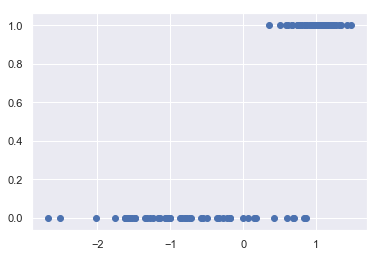

In [9]:
plt.scatter(x,y)

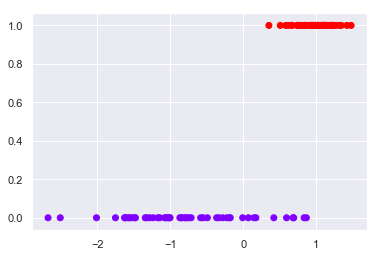

In [10]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow')

In [11]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [15]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[2.72265993]]
[-0.69929574]


In [44]:
# Let’s see how the model performs against data that it hasn’t been trained on.

In [17]:
y_pred = lr.predict(x_test)

In [18]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)


array([[14,  1],
       [ 0, 10]])

In [19]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.99328743, 0.00671257],
       [0.09253791, 0.90746209],
       [0.96906699, 0.03093301],
       [0.67367966, 0.32632034],
       [0.13877005, 0.86122995],
       [0.77126366, 0.22873634],
       [0.97852445, 0.02147555],
       [0.18433331, 0.81566669],
       [0.97435839, 0.02564161],
       [0.17013315, 0.82986685],
       [0.98510836, 0.01489164],
       [0.5575901 , 0.4424099 ],
       [0.97169685, 0.02830315],
       [0.99124982, 0.00875018],
       [0.08783775, 0.91216225],
       [0.57560793, 0.42439207],
       [0.97999343, 0.02000657],
       [0.94753481, 0.05246519],
       [0.0969226 , 0.9030774 ],
       [0.23898596, 0.76101404],
       [0.21003708, 0.78996292],
       [0.98313162, 0.01686838],
       [0.20970041, 0.79029959],
       [0.13660585, 0.86339415],
       [0.19705945, 0.80294055]])

In [20]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

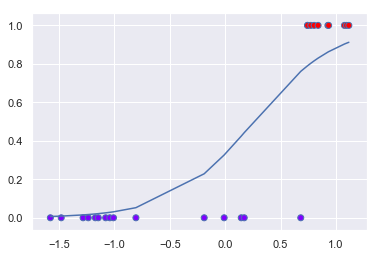

In [21]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

In [52]:
![title]('pic.png')

/bin/sh: -c: line 0: syntax error near unexpected token `'pic.png''
/bin/sh: -c: line 0: `[title]('pic.png')'
